In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 1: Importing Data

In [217]:
df=pd.read_csv(r'C:\Users\Priyanka\Downloads\Anil\Machine Learning and NLP Python documents\Statistics and Machine Learning\Module13_Telecom_churn_case_study\telecom_churn_data.csv',encoding='ISO-8859-1')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Understanding the Data

In [218]:
print(df.shape)
print(df.info())

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [219]:
# Listing the Column Names for readability
df.columns.values
#list(df.columns)

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [220]:
#grouping columns based on datatypes
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
        'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
        'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
        'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
        'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
        'sachet_3g_9', 'aon'],
       dtype='object'),
 dtype('float64'): Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
        'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
        'onnet_mou_8',
        ...
        'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       

## Data Preparation - Date Group Columns

In [221]:
#Converting date columns from object to datetime

date_columns=df[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
        'date_of_last_rech_8', 'date_of_last_rech_9',
        'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
        'date_of_last_rech_data_8', 'date_of_last_rech_data_9']]

date_columns.head()


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [222]:
# unique values in date columns
print(date_columns.nunique())

#converting date columns to datetype format
date_columns=date_columns.astype('datetime64[ns]')

last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
last_date_of_month_9         1
date_of_last_rech_6         30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_9         30
date_of_last_rech_data_6    30
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
date_of_last_rech_data_9    30
dtype: int64


In [223]:
print(date_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99398 non-null datetime64[ns]
last_date_of_month_8        98899 non-null datetime64[ns]
last_date_of_month_9        98340 non-null datetime64[ns]
date_of_last_rech_6         98392 non-null datetime64[ns]
date_of_last_rech_7         98232 non-null datetime64[ns]
date_of_last_rech_8         96377 non-null datetime64[ns]
date_of_last_rech_9         95239 non-null datetime64[ns]
date_of_last_rech_data_6    25153 non-null datetime64[ns]
date_of_last_rech_data_7    25571 non-null datetime64[ns]
date_of_last_rech_data_8    26339 non-null datetime64[ns]
date_of_last_rech_data_9    25922 non-null datetime64[ns]
dtypes: datetime64[ns](12)
memory usage: 9.2 MB
None


In [224]:
#Filtering Day from date of recharge columns
date_columns['day_of_last_rech_6'] =  date_columns.date_of_last_rech_6.dt.day
date_columns['day_of_last_rech_7'] =  date_columns.date_of_last_rech_7.dt.day
date_columns['day_of_last_rech_8'] =  date_columns.date_of_last_rech_8.dt.day

#Imputing missing day fields with 0
date_columns.loc[:,'day_of_last_rech_6']=date_columns['day_of_last_rech_6'].fillna('0')
date_columns.loc[:,'day_of_last_rech_7']=date_columns['day_of_last_rech_7'].fillna('0')
date_columns.loc[:,'day_of_last_rech_8']=date_columns['day_of_last_rech_8'].fillna('0')


In [238]:
#Dropping last date of month columns as it contains only one value and variance is low
#Dropping Date of last recharge columns as day is extracted and is not useful to us anymore
#Dropping date of lsat recharge data fields as the missing values in > 70 %

date_columns=date_columns.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                               'date_of_last_rech_9','last_date_of_month_6','last_date_of_month_7',
                               'last_date_of_month_8','last_date_of_month_9','date_of_last_rech_data_6',
                               'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
                               ,axis=1)

In [227]:
round(100*(date_columns.isnull().sum()/len(date_columns.index)),2)
#date_int_columns=date_int_columns.astype('int')

day_of_last_rech_6    0.0
day_of_last_rech_7    0.0
day_of_last_rech_8    0.0
dtype: float64

## Data Preparation - int group Columns

In [271]:
int_columns=df[['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
        'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
        'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
        'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
        'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
        'sachet_3g_9', 'aon']]
int_columns.head()

,mobile_number,circle_id,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,...,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon
0,7000842753,109,4,3,2,6,362,252,252,0,...,0,1,1,1,0,0,0,0,0,968
1,7001865778,109,4,9,11,5,74,384,283,121,...,0,0,0,0,0,0,0,0,0,1006
2,7001625959,109,5,4,2,7,168,315,116,358,...,1,0,0,0,0,0,0,0,0,1103
3,7001204172,109,10,11,18,14,230,310,601,410,...,0,0,0,0,0,0,0,0,0,2491
4,7000142493,109,5,6,3,4,196,350,287,200,...,0,0,0,0,0,0,0,0,0,1526


In [272]:
# Count of unique values in int columns
print(int_columns.nunique())

mobile_number         99999
circle_id                 1
total_rech_num_6        102
total_rech_num_7        101
total_rech_num_8         96
total_rech_num_9         97
total_rech_amt_6       2305
total_rech_amt_7       2329
total_rech_amt_8       2347
total_rech_amt_9       2304
max_rech_amt_6          202
max_rech_amt_7          183
max_rech_amt_8          213
max_rech_amt_9          201
last_day_rch_amt_6      186
last_day_rch_amt_7      173
last_day_rch_amt_8      199
last_day_rch_amt_9      185
monthly_2g_6              5
monthly_2g_7              6
monthly_2g_8              6
monthly_2g_9              5
sachet_2g_6              32
sachet_2g_7              35
sachet_2g_8              34
sachet_2g_9              32
monthly_3g_6             12
monthly_3g_7             15
monthly_3g_8             12
monthly_3g_9             11
sachet_3g_6              25
sachet_3g_7              27
sachet_3g_8              29
sachet_3g_9              27
aon                    3489
dtype: int64


In [273]:
#Checking for missing values in int columns
#round(100*(int_columns.isnull().sum()/len(int_columns.index)),2)

In [274]:
#Set mobile_number as index and drop circle_id column as it has only one column
#df=df.set_index('mobile_number',drop=True)
#df.drop(['circle_id'],axis=1)
#round(100*(int_columns.isnull().sum()/len(int_columns.index)),2)

In [275]:
# Conversion of the number of months by 12
int_columns.loc[:,'aon_years']=int_columns.aon/365
int_columns.loc[:,'aon_years'] = int_columns['aon_years'].astype(int)

int_columns.head()

,mobile_number,circle_id,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aon_years
0,7000842753,109,4,3,2,6,362,252,252,0,...,1,1,1,0,0,0,0,0,968,2
1,7001865778,109,4,9,11,5,74,384,283,121,...,0,0,0,0,0,0,0,0,1006,2
2,7001625959,109,5,4,2,7,168,315,116,358,...,0,0,0,0,0,0,0,0,1103,3
3,7001204172,109,10,11,18,14,230,310,601,410,...,0,0,0,0,0,0,0,0,2491,6
4,7000142493,109,5,6,3,4,196,350,287,200,...,0,0,0,0,0,0,0,0,1526,4


In [276]:
int_columns[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
        'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
        'sachet_3g_9']].describe()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581
std,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,4.000000,42.000000,48.000000,44.000000,40.000000,14.000000,16.000000,16.000000,11.000000,29.000000,35.000000,41.000000,49.000000


In [277]:
#Deriving New columns for Good Phase(6 and 7 months)
#Sachet subscription
int_columns.loc[:,'sachet_2g_good_ph'] = (int_columns.sachet_2g_6 + int_columns.sachet_2g_7)/2
int_columns.loc[:,'sachet_3g_good_ph'] = (int_columns.sachet_3g_6 + int_columns.sachet_3g_7)/2

#Monthly 2G/3G
int_columns.loc[:,'monthly_2g_good_ph'] = (int_columns.monthly_2g_6 + int_columns.monthly_2g_7)/2
int_columns.loc[:,'monthly_3g_good_ph'] = (int_columns.monthly_3g_6 + int_columns.monthly_3g_7)/2

#max_recaharge amount
int_columns.loc[:,'max_rech_amt_good_ph'] = (int_columns.max_rech_amt_6 + int_columns.max_rech_amt_7)/2
int_columns.loc[:,'total_rech_num_good_ph'] = (int_columns.total_rech_num_6 + int_columns.total_rech_num_7)/2

# Average total recharge for first 2 months
int_columns.loc[:,'tot_rech_amt_good_ph'] = (int_columns.total_rech_amt_6 + int_columns.total_rech_amt_7)/2
#df['avg_tot_rech_3mths'] = (df['total_rech_amt_6']+df['total_rech_amt_7']+df['total_rech_amt_8'])/3

int_columns.loc[:, 'last_day_rch_amt_good_ph'] = (int_columns.last_day_rch_amt_6 + int_columns.last_day_rch_amt_7)/2

In [278]:
#Dropping circle_id column as it contains only one value and variance is low
#Dropping aon column as new column is derived and is no longer useful 
#Dropping all columns with suffix _6 and _7 as new columns derived 

int_columns=int_columns.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6',
                               'sachet_3g_7','monthly_2g_6','monthly_2g_7',
                               'monthly_3g_6','monthly_3g_7','max_rech_amt_6',
                               'max_rech_amt_7','total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7',
                             'aon','circle_id','last_day_rch_amt_6','last_day_rch_amt_7']
                               ,axis=1)


In [279]:
int_columns.head()

,mobile_number,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_8,last_day_rch_amt_9,monthly_2g_8,...,sachet_3g_9,aon_years,sachet_2g_good_ph,sachet_3g_good_ph,monthly_2g_good_ph,monthly_3g_good_ph,max_rech_amt_good_ph,total_rech_num_good_ph,tot_rech_amt_good_ph,last_day_rch_amt_good_ph
0,7000842753,2,6,252,0,252,0,252,0,0,...,0,2,0.0,0.0,0.0,1.0,252.0,3.5,307.0,252.0
1,7001865778,11,5,283,121,65,50,30,0,0,...,0,2,0.0,0.0,0.5,0.0,99.0,6.5,229.0,33.5
2,7001625959,2,7,116,358,86,100,86,0,0,...,0,3,0.0,0.0,0.0,0.0,143.0,4.5,241.5,100.0
3,7001204172,18,14,601,410,50,50,50,30,0,...,0,6,0.0,0.0,0.0,0.0,55.0,10.5,270.0,40.0
4,7000142493,3,4,287,200,110,50,110,50,0,...,0,4,0.5,0.0,0.0,0.0,83.0,5.5,273.0,80.0


## Data Preparation - Float group Columns

In [318]:
#groupingcolumnsbasedondatatypes
#df.columns[colforcoldf.dtypes=='float64']

list(df.loc[:,df.dtypes==float])
float_columns=df[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','arpu_9','onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','og_others_6','og_others_7','og_others_8','og_others_9','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9','ic_others_6','ic_others_7','ic_others_8','ic_others_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']]

In [319]:
#Checking for null values

float_null= round(100*(float_columns.isnull().sum()/len(float_columns.index)),2)
float_null[float_null > 10]

total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
night_pck_user_6      74.85
night_pck_user_7      74.43
night_pck_user_8      73.66
night_pck_user_9      74.08
fb_user_6             74.85
fb_user_7             74.43
fb_user_8             73.66
fb_user_9           

In [321]:
# Dropping the above columns with more than 70% missing values

float_columns=float_columns.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                              'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','count_rech_2g_6',
                              'count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7',
                              'count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7',
                              'av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                              'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7',
                              'night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'],axis=1)


In [324]:
float_columns.columns.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9

In [ ]:
## Deriving new features from existing columns 

# Average revenue for first 2 months and average revenue for first 3 months 
df['arpu_2mths_good_phase'] = (df['arpu_6']+df['arpu_7'])/2
df['arpu_3mths'] = (df['arpu_6']+df['arpu_7']+df['arpu_8'])/3

## Data Preparation - Master data frame

In [326]:
# Search Column name using string
avg_cols = [col for col in df.columns if 'int' in col]
#print(list(df.columns))
avg_cols

[]

In [85]:
#High value customer
threshold_value=df['avg_tot_rech_2mths_good_phase'].quantile(.70)
df['high_value_customer']=df['avg_tot_rech_2mths_good_phase'].apply(lambda x: True if x==True else ( 1 if x > threshold_value else 0))

#
#

In [86]:
df[['arpu_2mths_good_phase','arpu_8','avg_tot_rech_2mths_good_phase','total_rech_amt_8','aon_years','high_value_customer']].head()

,arpu_2mths_good_phase,arpu_8,avg_tot_rech_2mths_good_phase,total_rech_amt_8,aon_years,high_value_customer
0,206.1005,213.803,307.0,252,2,0
1,194.5605,268.321,229.0,283,2,0
2,178.3740,210.226,241.5,116,3,0
3,236.2200,508.054,270.0,601,6,0
4,285.7560,238.174,273.0,287,4,0


In [87]:
#df[['arpu_2mths_good_phase','arpu_8','avg_tot_rech_2mths_good_phase','total_rech_amt_8']]
#sns.boxplot(x='arpu_2mths_good_phase', y='avg_tot_rech_2mths_good_phase', data=df)
#plt.show()

In [88]:
df['high_value_customer'].value_counts()

0    70020
1    29979
Name: high_value_customer, dtype: int64

In [89]:
usage_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
def churn_calc(row):
    return 1 if (row['total_ic_mou_9']==0) & (row['total_og_mou_9']==0) & (row['vol_2g_mb_9']==0) & (row['vol_3g_mb_9']==0) else 0

In [90]:
df['churn']=df[usage_cols].apply(churn_calc,axis=1)
df['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

In [91]:
def phase_calc(row):
    #calculate threshold based on normal distribution.
    
    #total_ic_mou_6
    ic_std=np.std([row['total_ic_mou_6'],row['total_ic_mou_7']])
    ic_mean=np.mean([row['total_ic_mou_6'],row['total_ic_mou_7']])
    ic_threshold=ic_mean-ic_std
    
    #total_og_mou_6
    og_std=np.std([row['total_og_mou_6'],row['total_og_mou_7']])
    og_mean=np.mean([row['total_og_mou_6'],row['total_og_mou_7']])
    og_threshold=og_mean-og_std
    
    #vol_2g_mb_6
    two_g_std=np.std([row['vol_2g_mb_6'],row['vol_2g_mb_7']])
    two_g_mean=np.mean([row['vol_2g_mb_6'],row['vol_2g_mb_7']])
    two_g_threshold=two_g_mean-two_g_std
    
    #vol_3g_mb_6
    three_g_std=np.std([row['vol_3g_mb_6'],row['vol_3g_mb_7']])
    three_g_mean=np.mean([row['vol_3g_mb_6'],row['vol_3g_mb_7']])
    three_g_threshold=three_g_mean-three_g_std
    
    if (row['total_ic_mou_8'] < ic_threshold) | (row['total_og_mou_8'] < og_threshold)\
        | (row['vol_2g_mb_8'] < two_g_threshold) | (row['vol_3g_mb_8'] < three_g_threshold):
        return 1
    else:
        return 0

In [92]:
df['action_required']=df.apply(phase_calc,axis=1)
df[(df['action_required']==False) &  (df['churn']==True)][['action_required','churn']].head()

,action_required,churn
0,0,1
35,0,1
45,0,1
94,0,1
117,0,1


In [93]:
#UNIVARIATE ANALYSIS

0    89.808898
1    10.191102
Name: churn, dtype: float64


Text(0.5, 1.0, 'churn Rate')

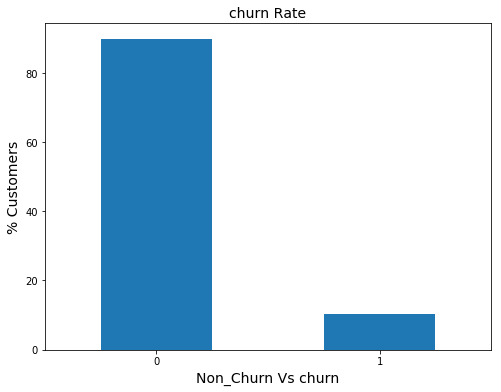

In [94]:
print(df['churn'].value_counts()*100.0 /len(df)),2
churn_rate_graph = (df['churn'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,figsize = (8,6))                                                                                                                                                 
churn_rate_graph.set_ylabel('% Customers',size = 14)
churn_rate_graph.set_xlabel('Non_Churn Vs churn',size = 14)
churn_rate_graph.set_title('churn Rate', size = 14)

           churn
aon_years       
0           2726
1           3509
2           1754
3            754
4            353
5            233
6            310
7            227
8            210
9             69
10            45
11             1


Text(0.5, 1.0, 'Churn count based on age on network')

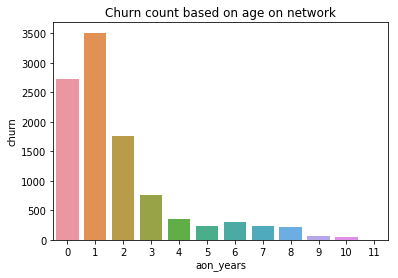

In [115]:
#Churn comparisions on other columns
#sns.boxplot(x=df.churn, y="aon_years", data=df)
#plt.title("Churn stats based on age on network")

aon_churn_counts=df.pivot_table(index=['aon_years'],values='churn', aggfunc='sum')
print(aon_churn_counts)

plt.subplot(1,1, 1)
usa=sns.barplot(x=aon_churn_counts.index, y="churn", data=aon_churn_counts)
plt.title("Churn count based on age on network")


In [119]:
aon_churn_hvc_counts=df.pivot_table(index=['aon_years'],values=['high_value_customer','churn'], aggfunc='sum')
print(aon_churn_hvc_counts)



           churn  high_value_customer
aon_years                            
0           2726                 4853
1           3509                 7616
2           1754                 4661
3            754                 3044
4            353                 1980
5            233                 1251
6            310                 2069
7            227                 1826
8            210                 1523
9             69                  572
10            45                  556
11             1                   28


Text(0.5, 1.0, 'Churn stats based on arpu on month 9')

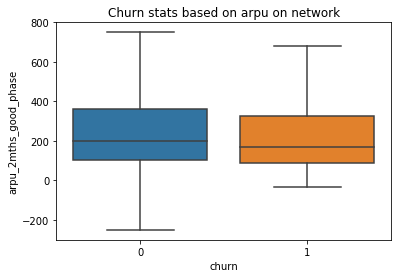

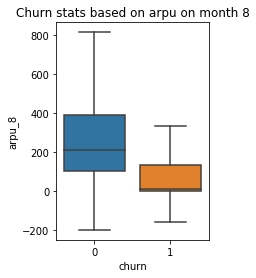

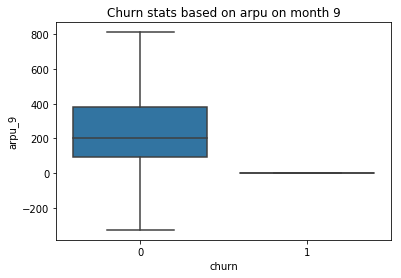

In [96]:
#Churn stats based on monthly ARPU
plt.figure(1)
plt.subplot(1,1, 1)
sns.boxplot(x=df.churn, y="arpu_2mths_good_phase", data=df, showfliers=False)
plt.title("Churn stats based on arpu on network")

plt.figure(2)
plt.subplot(1, 2, 2)
sns.boxplot(x=df.churn, y="arpu_8", data=df, showfliers=False)
plt.title("Churn stats based on arpu on month 8")

plt.figure(3)
plt.subplot(1, 1, 1)
sns.boxplot(x=df.churn, y="arpu_9", data=df, showfliers=False)
plt.title("Churn stats based on arpu on month 9")


Text(0.5, 1.0, 'Churn stats based on total recharge on month 9')

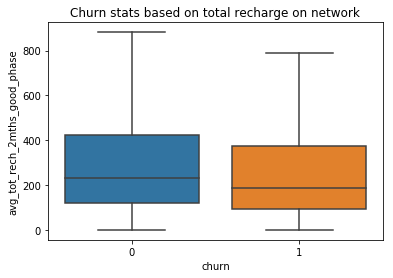

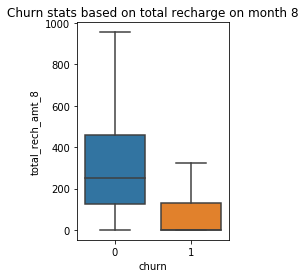

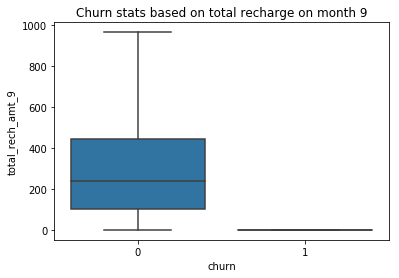

In [97]:
#Churn stats based on monthly Total recharge
plt.figure(1)
plt.subplot(1,1, 1)
sns.boxplot(x=df.churn, y="avg_tot_rech_2mths_good_phase", data=df, showfliers=False)
plt.title("Churn stats based on total recharge on network")

plt.figure(2)
plt.subplot(1, 2, 2)
sns.boxplot(x=df.churn, y="total_rech_amt_8", data=df, showfliers=False)
plt.title("Churn stats based on total recharge on month 8")

plt.figure(3)
plt.subplot(1, 1, 1)
sns.boxplot(x=df.churn, y="total_rech_amt_9", data=df, showfliers=False)
plt.title("Churn stats based on total recharge on month 9")


In [98]:
#Conclusions from univariate analysis

# 1. Churn rate is the highest for customers who are less thean 3 years with the operator.
# 2. The max revenue for churn customer is below the average revenue for non churn customer.
# 3. The max total recharge for churn customer is below the total recharge for non churn customer.

In [104]:
# Search Column name using string
search = [col for col in df.columns if 'high' in col]
search

['high_value_customer']

           churn  high_value_customer
aon_years                            
0          17123                17123
1          26380                26380
2          15421                15421
3          10135                10135
4           6173                 6173
5           4196                 4196
6           6692                 6692
7           5662                 5662
8           5086                 5086
9           1663                 1663
10          1412                 1412
11            56                   56
